## Rainfall Prediction - Weather Forecasting

**Problem Statement:**

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

* Number of columns: 23
* Date  - The date of observation
* Location  -The common name of the location of the weather station
* MinTemp  -The minimum temperature in degrees celsius
* MaxTemp -The maximum temperature in degrees celsius
* Rainfall  -The amount of rainfall recorded for the day in mm
* Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine  -The number of hours of bright sunshine in the day.
* WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am -Direction of the wind at 9am
* WindDir3pm -Direction of the wind at 3pm
* WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am -Humidity (percent) at 9am
* Humidity3pm -Humidity (percent) at 3pm
* Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am - Fraction of sky obscured by cloud at 9am. 
* Cloud3pm -Fraction of sky obscured by cloud 
* Temp9am-Temperature (degrees C) at 9am
* Temp3pm -Temperature (degrees C) at 3pm
* RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [3]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# to import dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [5]:
# to check column names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# to check basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

the dataset have 8425 rows and 23 columns.There are many null values in most of the columns

In [7]:
# to check null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
# to Check unique values of each column
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
# to check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

2011-02-07    5
2011-01-19    5
2011-02-22    5
2011-02-15    5
2011-05-11    5
             ..
2013-03-05    1
2013-04-17    1
2013-04-26    1
2013-04-27    1
2013-04-09    1
Name: Date, Length: 3004, dtype: int64
****************************************
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
****************************************
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
-1.4      1
 26.6     1
 26.9     1
 0.3      1
-1.1      1
Name: MinTemp, Length: 285, dtype: int64
****************************************
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
39.5     1
10.4     1
9.4      1
40.6     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
****************************************
0.0  

In [10]:
# to change date data type
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# to check datatype
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [12]:
# to Extract Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

# to Extract Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

# to Extract Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

In [13]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [14]:
# to check dataset 
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

In [15]:
#Filling null values in MinTemp with it's mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Fillinf null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [16]:
# to check null values after replacing them with mean and mode
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

## **Visualization**

In [17]:
#checking categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


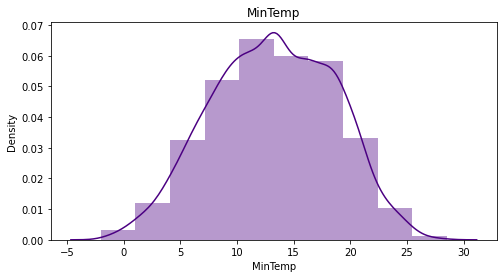

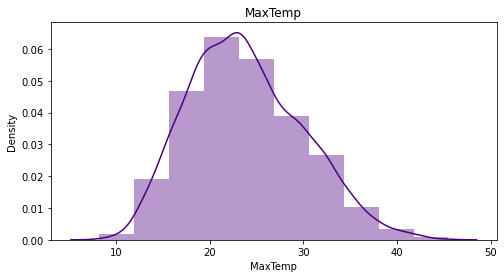

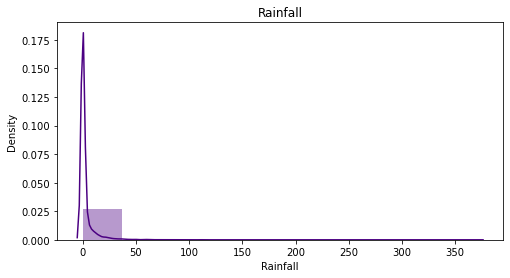

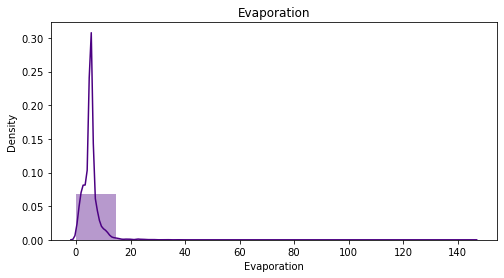

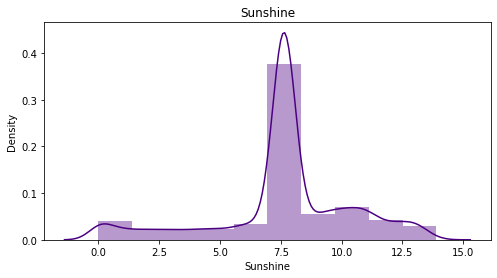

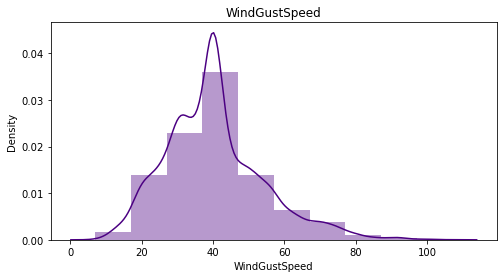

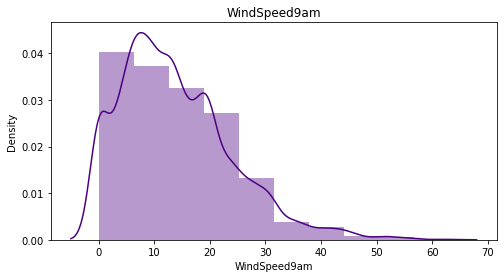

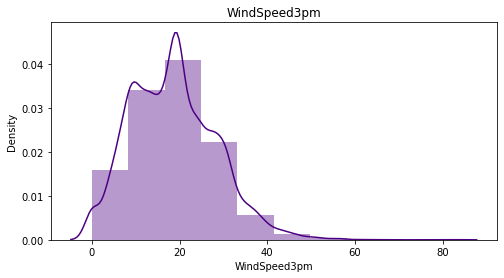

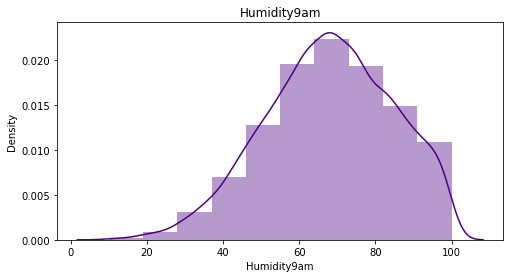

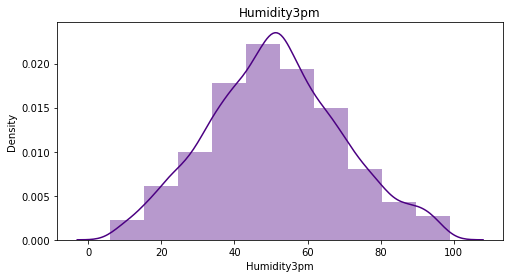

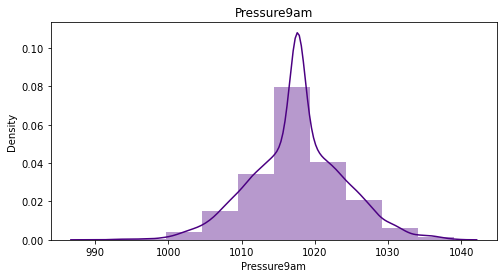

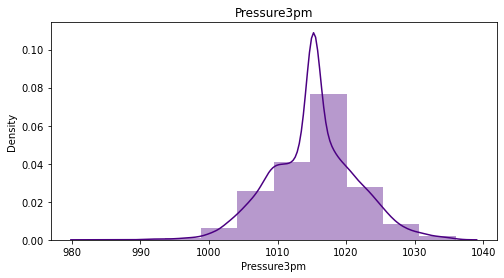

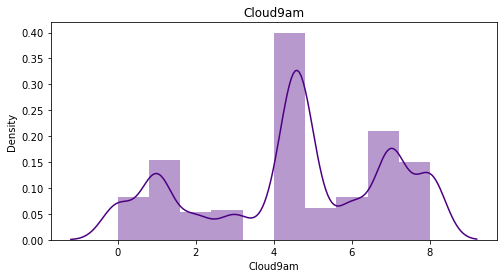

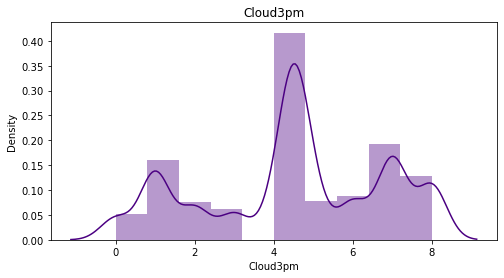

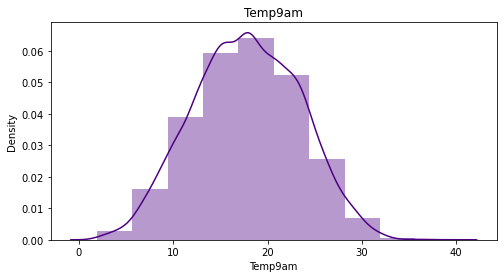

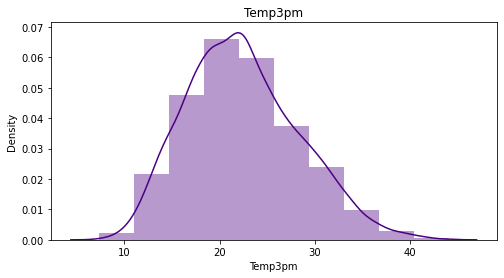

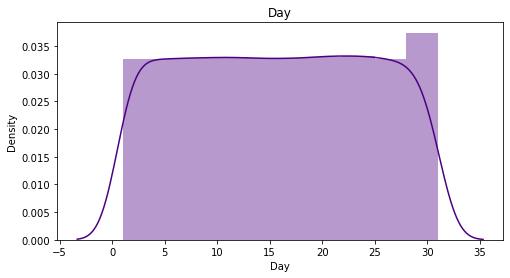

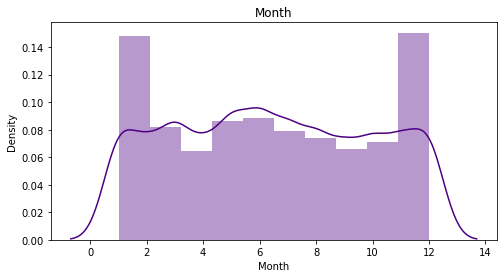

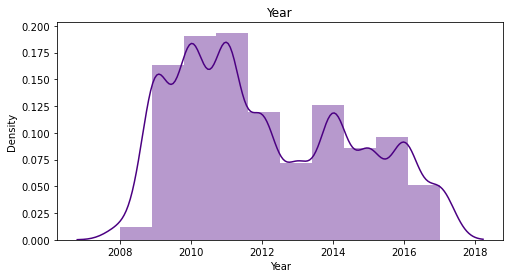

In [19]:
#Distribution plot for all numerical columns
for i in df[num_col]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

* Min Temp is normally distributed
* Max Temp is slightly skewed right
* Rainfall is skewed right
* Evaporation is skewed right
* Sunshine is not normally distributed
* WindGustSpeed, WindSpeed9am,WindSpeed3pm is skewed right
* Humidity9am is slightly skewed left and Humidity3pm is normally distributed.
* Pressure9am, Pressure3pm, Cloud9am, Cloud3pm,Temp9am,Temp3pm,Day, Month and Year has no skewness however the data is not distributed normally

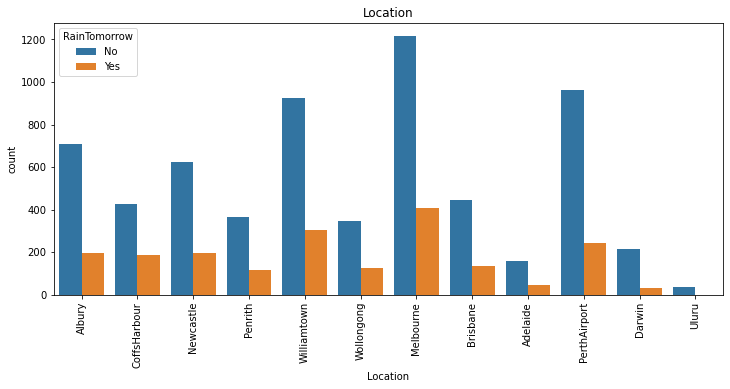

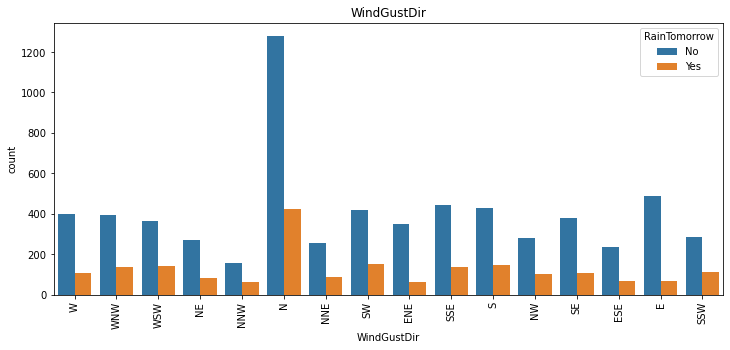

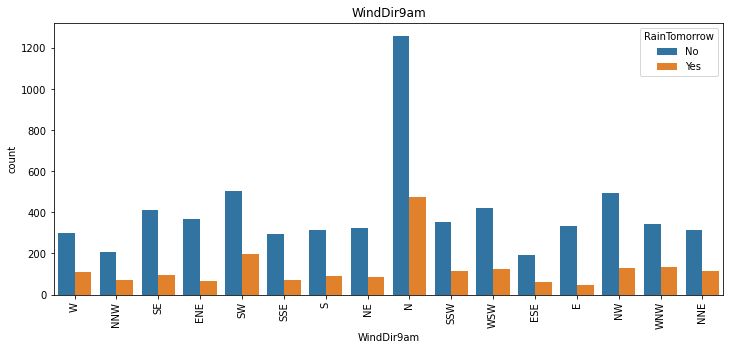

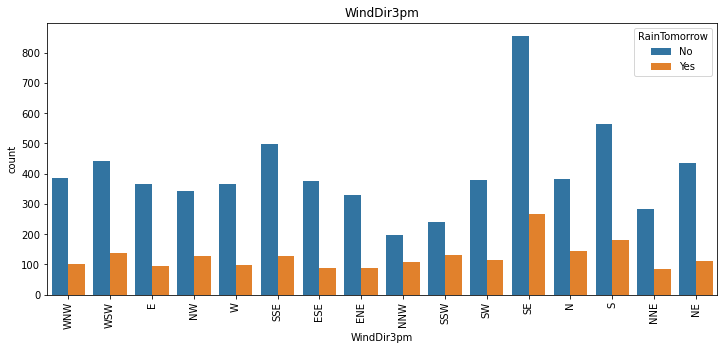

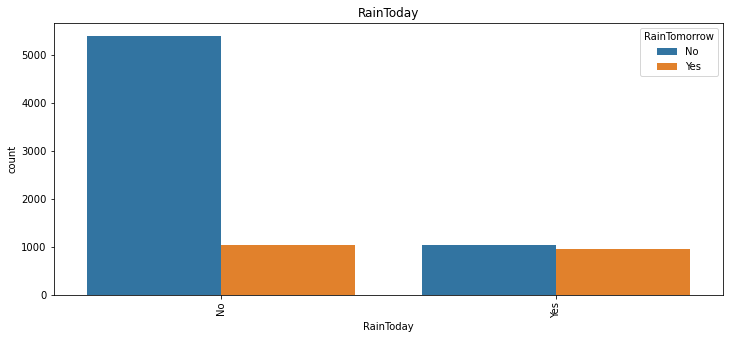

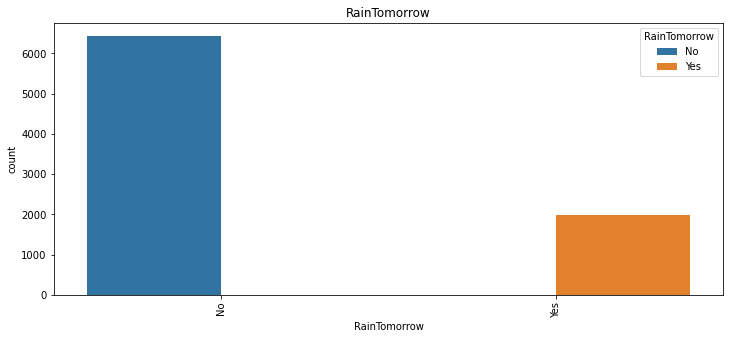

In [20]:
#Distribution plot for all categorical_columns
for i in df[cat_col]:              
    plt.figure(figsize = (12, 5))
    sns.countplot(x= df[i], hue = 'RainTomorrow',data= df)
    plt.title(i)
    plt.xticks(rotation=90);
    plt.show()

* Highest rainfall data from Melbourbne and least from Uluru
* We can clearly see that the wind gust was strongest towards the north, followed by the SW, SSE, S,WNW.
* In the plots we can clearly see that the wing direction was towards the N at 9am and in the SE at 3pm
* We can hardy see any difference in the rainfall today and tomorrow.

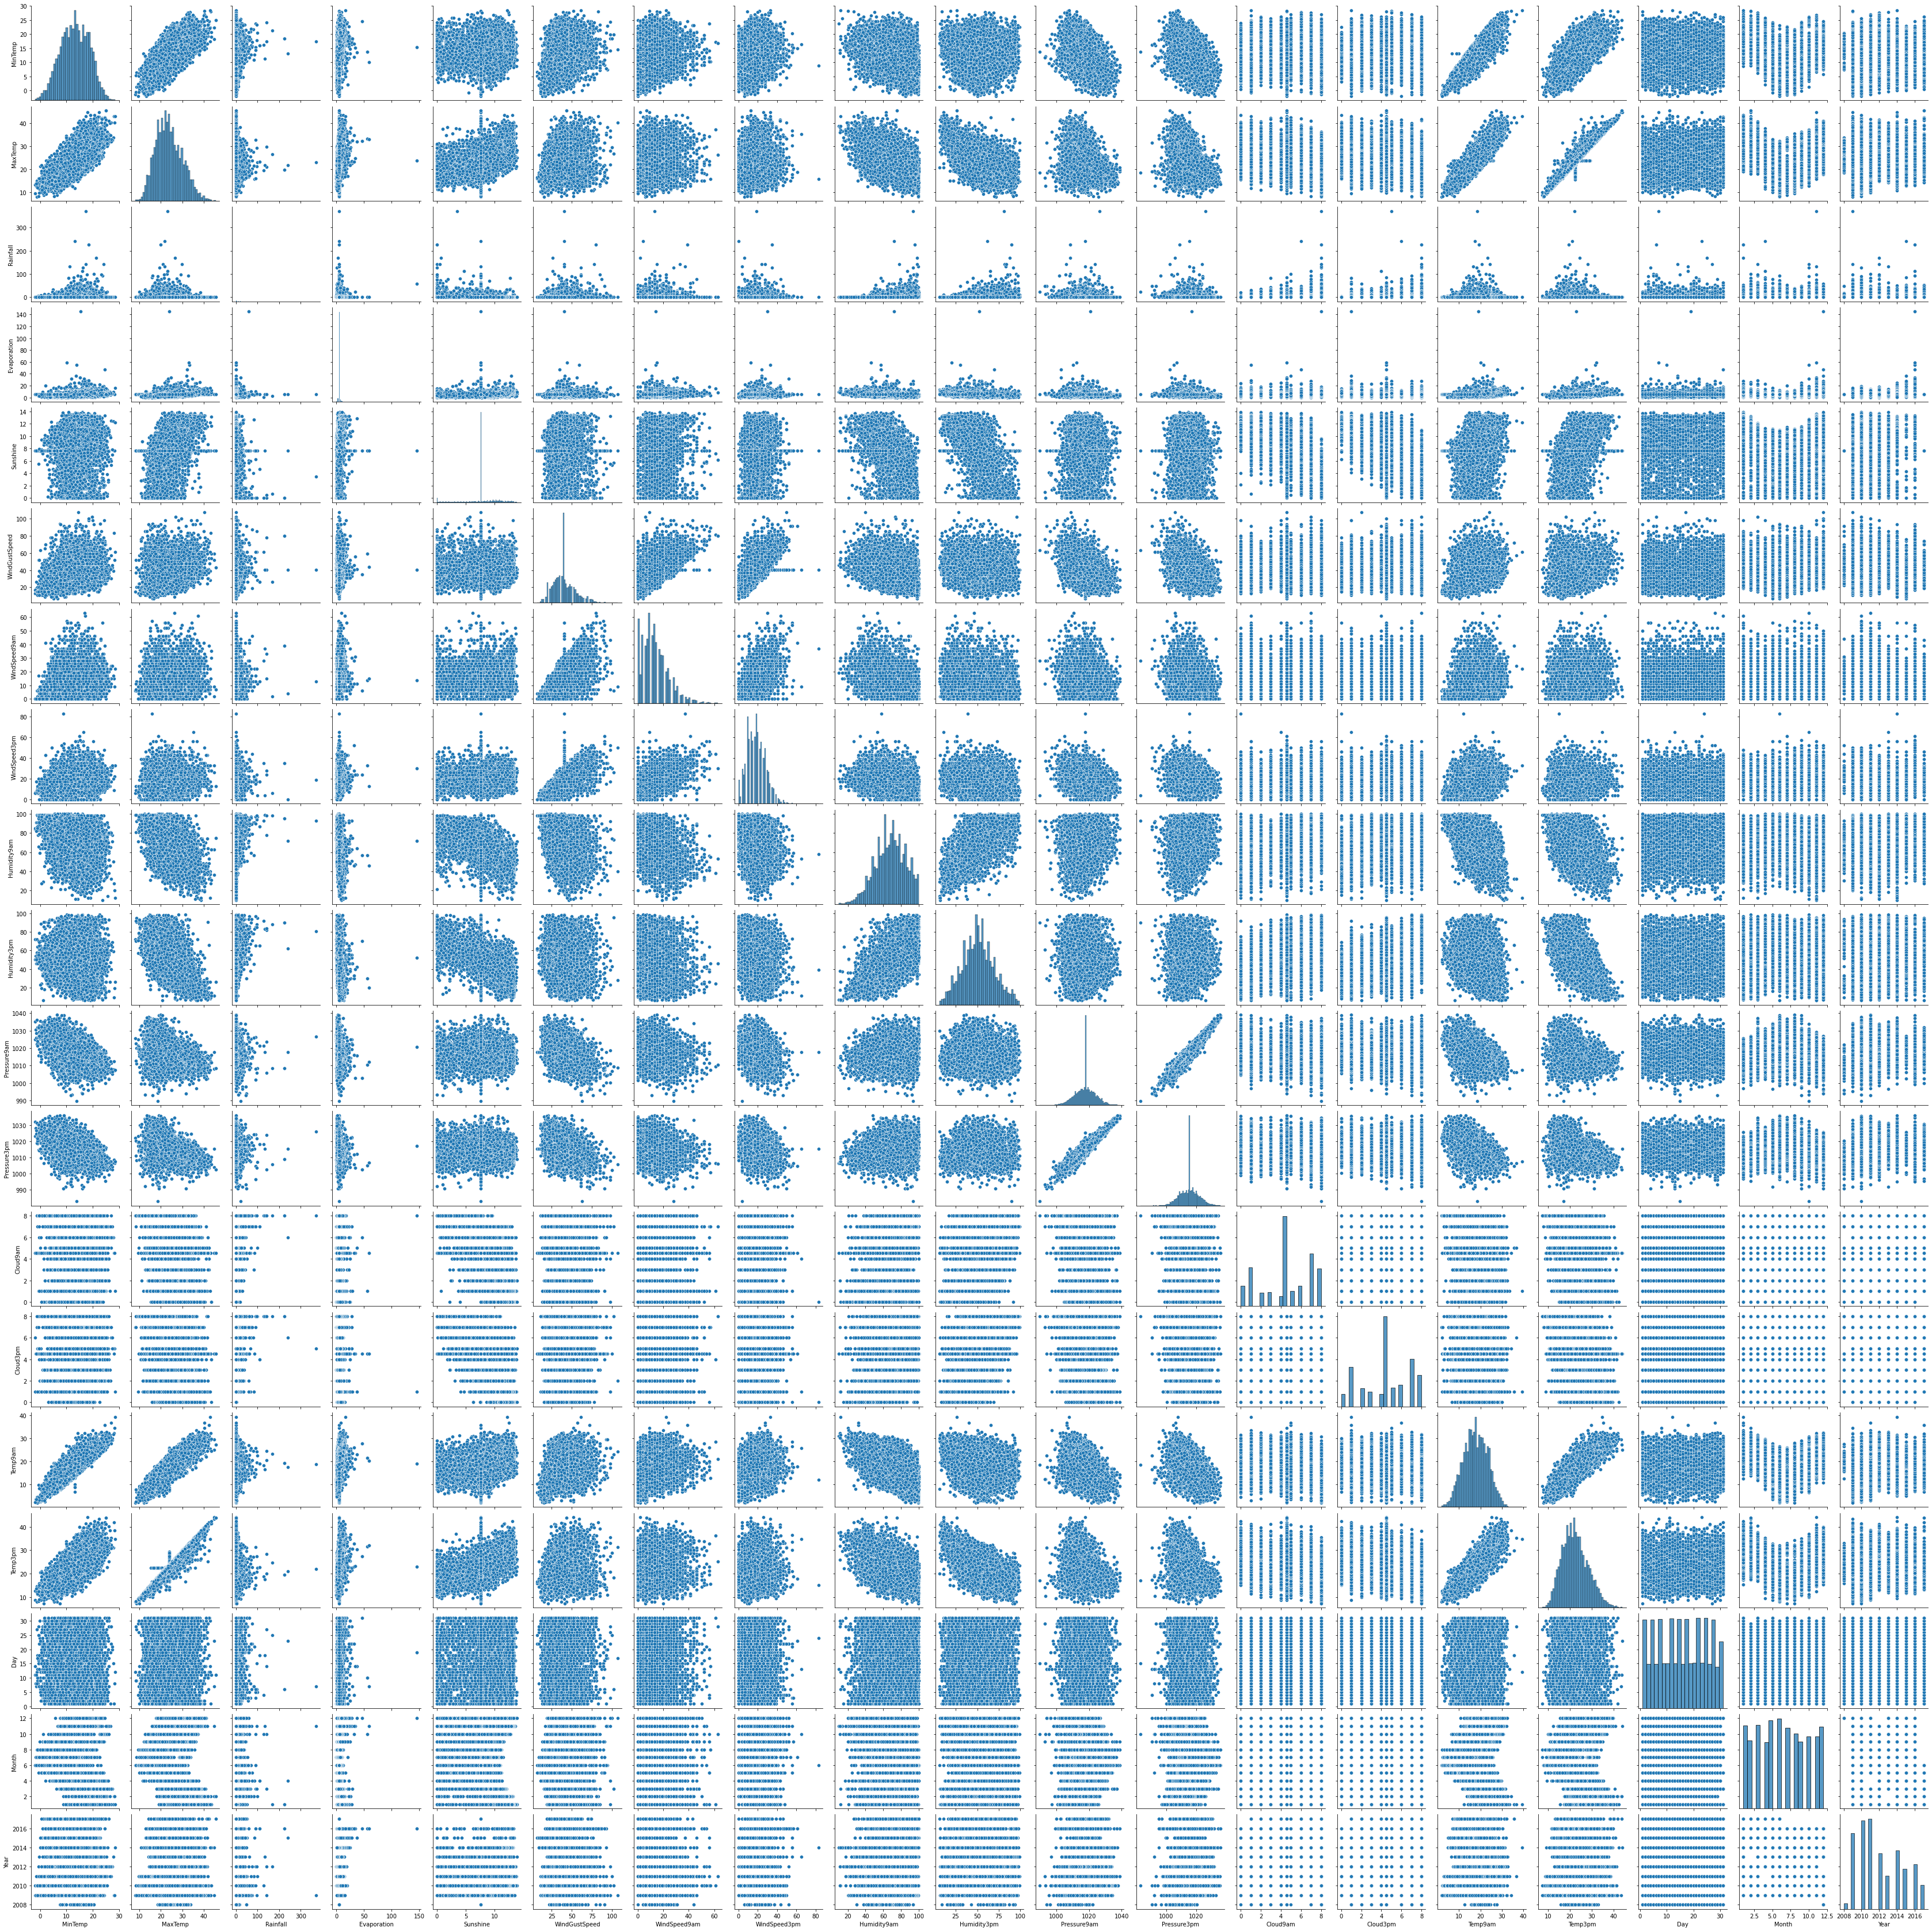

In [21]:
sns.pairplot(df)

There is linear relationship between columns and there are many outliers also present in dataset.

## **Identifying the Outliers**

MinTemp             AxesSubplot(0.125,0.749828;0.133621x0.130172)
MaxTemp          AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Rainfall          AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Evaporation      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Sunshine         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
WindGustSpeed       AxesSubplot(0.125,0.593621;0.133621x0.130172)
WindSpeed9am     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
WindSpeed3pm      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Humidity9am      AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Humidity3pm      AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Pressure9am         AxesSubplot(0.125,0.437414;0.133621x0.130172)
Pressure3pm      AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Cloud9am          AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Cloud3pm         AxesSubplot(0.606034,0.437414;0.133621x0.130172)
Temp9am          AxesSubplot(0.766379,0.437414;0.133621x0.130172)
Temp3pm   

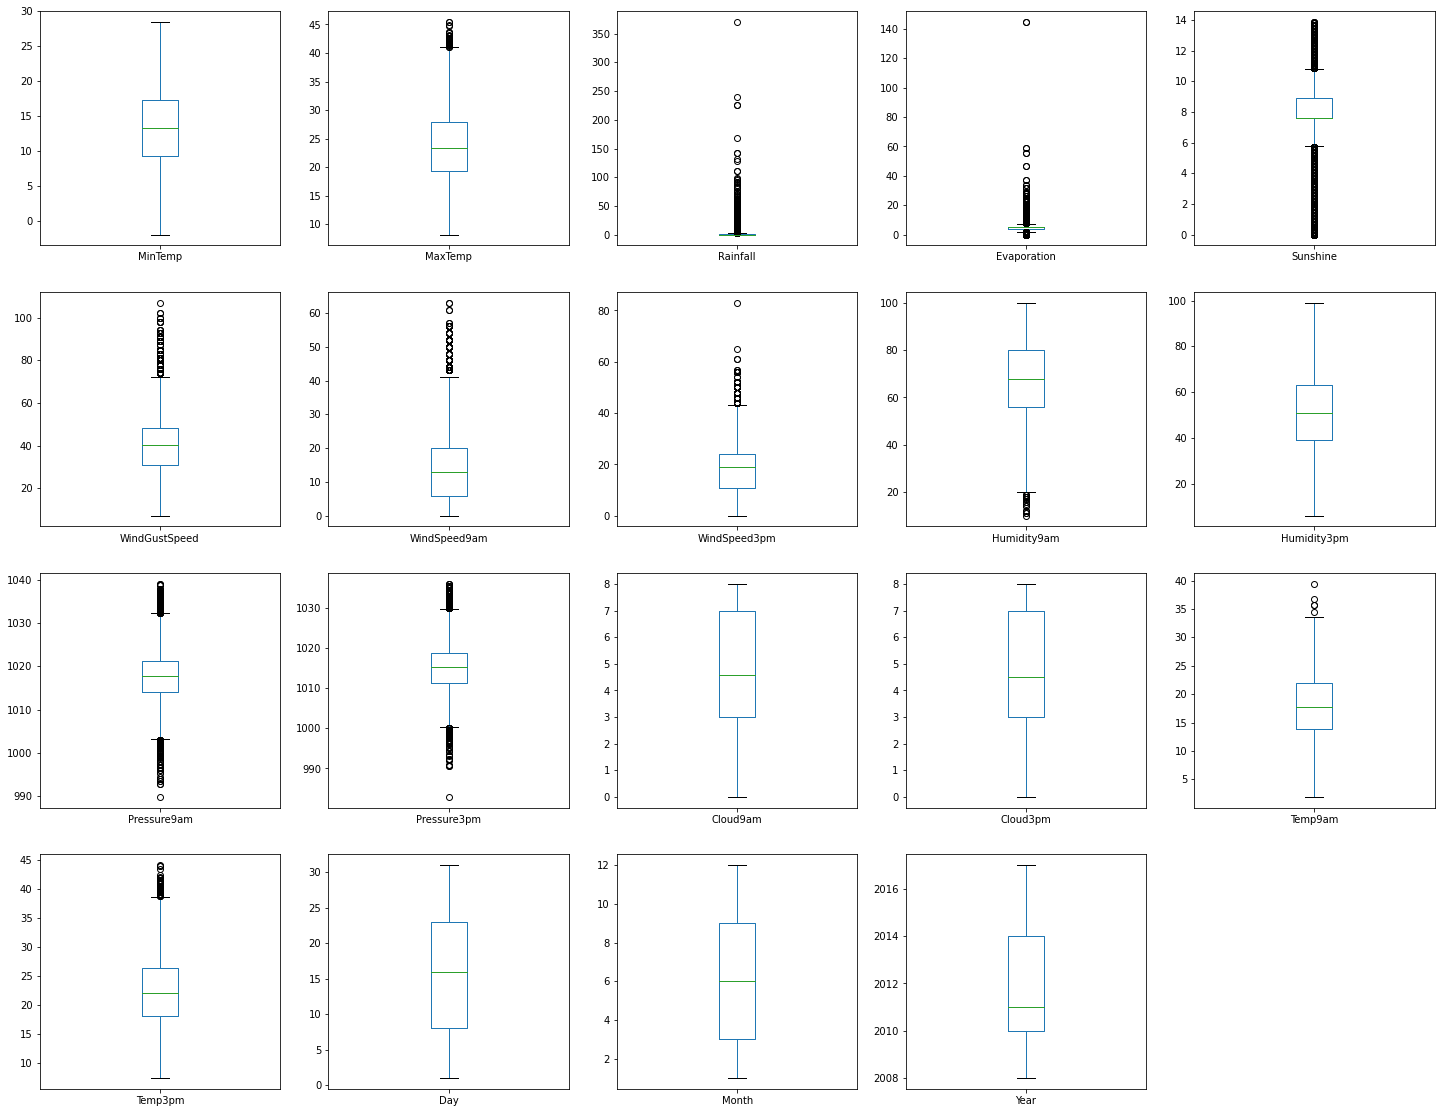

In [23]:
# to find out outliers in the dataset
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(25,25))

##### From the above boxplots, we can see that features having outliers are: MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am,Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm

Lets remove the outliers

In [24]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

## **i) Zscore method:**

In [25]:
from scipy.stats import zscore
# removing outliers with zscore
z=np.abs(zscore(feature))
df_new=df[(z<3).all(axis=1)]

In [26]:
df_new.shape

(7987, 25)

In [27]:
df.shape

(8425, 25)

In [28]:
#Checking dataloss in zscore method
Dataloss=(((8425-7987)/8425)*100)
Dataloss

5.198813056379822

## **Checking for skewness:**

In [29]:
#Checking for skewness
df_new.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.519090
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

We can see that features, Sunshine, Rainfall, Evaporation, Windspeed9am, Windgustspeed has skewness.

## **Removing skewness using log transformation**

In [30]:
df_new["Sunshine"] = np.log1p(df_new["Sunshine"])
df_new["Rainfall"] = np.log1p(df_new["Rainfall"])
df_new["Evaporation"] = np.log1p(df_new["Evaporation"])
df_new["WindSpeed9am"] = np.log1p(df_new["WindSpeed9am"])
df_new["WindGustSpeed"] = np.log1p(df_new["WindGustSpeed"])

In [31]:
#checking skewness again
df_new.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         1.811941
Evaporation     -0.993594
Sunshine        -2.460672
WindGustSpeed   -0.526267
WindSpeed9am    -1.186810
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
Day              0.002731
Month            0.054460
Year             0.430100
dtype: float64

## **Encoding the categorical columns**

In [32]:
le=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(le.fit_transform)
df_new

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.900000  0.470004      1.85464    2.1555   
1            1      7.4  25.100000  0.000000      1.85464    2.1555   
2            1     12.9  25.700000  0.000000      1.85464    2.1555   
3            1      9.2  28.000000  0.000000      1.85464    2.1555   
4            1     17.5  32.300000  0.693147      1.85464    2.1555   
...        ...      ...        ...       ...          ...       ...   
8420         9      2.8  23.400000  0.000000      1.85464    2.1555   
8421         9      3.6  25.300000  0.000000      1.85464    2.1555   
8422         9      5.4  26.900000  0.000000      1.85464    2.1555   
8423         9      7.8  27.000000  0.000000      1.85464    2.1555   
8424         9     14.9  23.859976  0.000000      1.85464    2.1555   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0              13       3.806662          13          14  ...       1007.1   
1              14       3.806662           6          15  ...       1007.8   
2              15       3.850148          13          15  ...       1008.7   
3               4       3.218876           9           0  ...       1012.8   
4              13       3.737670           1           7  ...       1006.0   
...           ...            ...         ...         ...  ...          ...   
8420            0       3.465736           9           1  ...       1020.3   
8421            6       3.135494           9           3  ...       1019.1   
8422            3       3.637586           9          14  ...       1016.8   
8423            9       3.367296          10           3  ...       1016.5   
8424            3       3.717818           2           2  ...       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  \
0     8.000000  4.503183     16.9     21.8          0             0    1   
1     4.566622  4.503183     17.2     24.3          0             0    2   
2     4.566622  2.000000     21.0     23.2          0             0    3   
3     4.566622  4.503183     18.1     26.5          0             0    4   
4     7.000000  8.000000     17.8     29.7          0             0    5   
...        ...       ...      ...      ...        ...           ...  ...   
8420  4.566622  4.503183     10.1     22.4          0             0   21   
8421  4.566622  4.503183     10.9     24.5          0             0   22   
8422  4.566622  4.503183     12.5     26.1          0             0   23   
8423  3.000000  2.000000     15.1     26.0          0             0   24   
8424  8.000000  8.000000     15.0     20.9          0             0   25   

      Month  Year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  
8424      6  2017  

[7987 rows x 25 columns]

## **Checking the corelation between feature and label**

In [33]:
df.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.717522  0.085723     0.254965  0.056184   
MaxTemp        0.717522  1.000000 -0.087710     0.322405  0.378403   
Rainfall       0.085723 -0.087710  1.000000     0.024742 -0.167120   
Evaporation    0.254965  0.322405  0.024742     1.000000  0.226001   
Sunshine       0.056184  0.378403 -0.167120     0.226001  1.000000   
WindGustSpeed  0.230058  0.139998  0.083374     0.136371 -0.013778   
WindSpeed9am   0.136872  0.013314  0.048812     0.104294 -0.018069   
WindSpeed3pm   0.178349  0.088172  0.021654     0.101126  0.030145   
Humidity9am   -0.130731 -0.390976  0.227595    -0.213108 -0.360831   
Humidity3pm    0.079048 -0.421879  0.234938    -0.161661 -0.440268   
Pressure9am   -0.429432 -0.325721 -0.069604    -0.177786  0.021887   
Pressure3pm   -0.422991 -0.403258 -0.031268    -0.189558 -0.035863   
Cloud9am       0.091604 -0.253968  0.183811    -0.062283 -0.533391   
Cloud3pm       0.038414 -0.250132  0.150187    -0.108022 -0.547304   
Temp9am        0.887119  0.866039 -0.007351     0.305264  0.250640   
Temp3pm        0.685520  0.974506 -0.090768     0.315109  0.395324   
Day            0.009446  0.015608 -0.013029     0.013597  0.004662   
Month         -0.245854 -0.163253 -0.016258     0.004362 -0.006694   
Year           0.044123  0.119772  0.004491     0.152708  0.065374   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.230058      0.136872      0.178349    -0.130731   
MaxTemp             0.139998      0.013314      0.088172    -0.390976   
Rainfall            0.083374      0.048812      0.021654     0.227595   
Evaporation         0.136371      0.104294      0.101126    -0.213108   
Sunshine           -0.013778     -0.018069      0.030145    -0.360831   
WindGustSpeed       1.000000      0.600198      0.634939    -0.269593   
WindSpeed9am        0.600198      1.000000      0.560660    -0.358391   
WindSpeed3pm        0.634939      0.560660      1.000000    -0.250953   
Humidity9am        -0.269593     -0.358391     -0.250953     1.000000   
Humidity3pm        -0.091860     -0.110587     -0.091004     0.633291   
Pressure9am        -0.407139     -0.174679     -0.251697     0.142374   
Pressure3pm        -0.372651     -0.138454     -0.207544     0.173415   
Cloud9am            0.023313     -0.000549      0.005061     0.404742   
Cloud3pm            0.078631      0.058198      0.003295     0.296862   
Temp9am             0.202298      0.109798      0.184188    -0.378344   
Temp3pm             0.102199     -0.002606      0.066087    -0.382401   
Day                -0.002876     -0.003067     -0.008957     0.003799   
Month               0.051968      0.038427      0.049483    -0.115530   
Year               -0.042402     -0.088489     -0.051466     0.099717   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.079048    -0.429432    -0.422991  0.091604  0.038414   
MaxTemp          -0.421879    -0.325721    -0.403258 -0.253968 -0.250132   
Rainfall          0.234938    -0.069604    -0.031268  0.183811  0.150187   
Evaporation      -0.161661    -0.177786    -0.189558 -0.062283 -0.108022   
Sunshine         -0.440268     0.021887    -0.035863 -0.533391 -0.547304   
WindGustSpeed    -0.091860    -0.407139    -0.372651  0.023313  0.078631   
WindSpeed9am     -0.110587    -0.174679    -0.138454 -0.000549  0.058198   
WindSpeed3pm     -0.091004    -0.251697    -0.207544  0.005061  0.003295   
Humidity9am       0.633291     0.142374     0.173415  0.404742  0.296862   
Humidity3pm       1.000000     0.001629     0.070369  0.424348  0.439965   
Pressure9am       0.001629     1.000000     0.961428 -0.070820 -0.082645   
Pressure3pm       0.070369     0.961428     1.000000 -0.012409 -0.028748   
Cloud9am          0.424348    -0.070820    -0.012409  1.000000  0.574943   
Cloud3pm          0.439965    -0.082645    -0.028748  0.574943  1.000000   
Temp9am       

<AxesSubplot:>

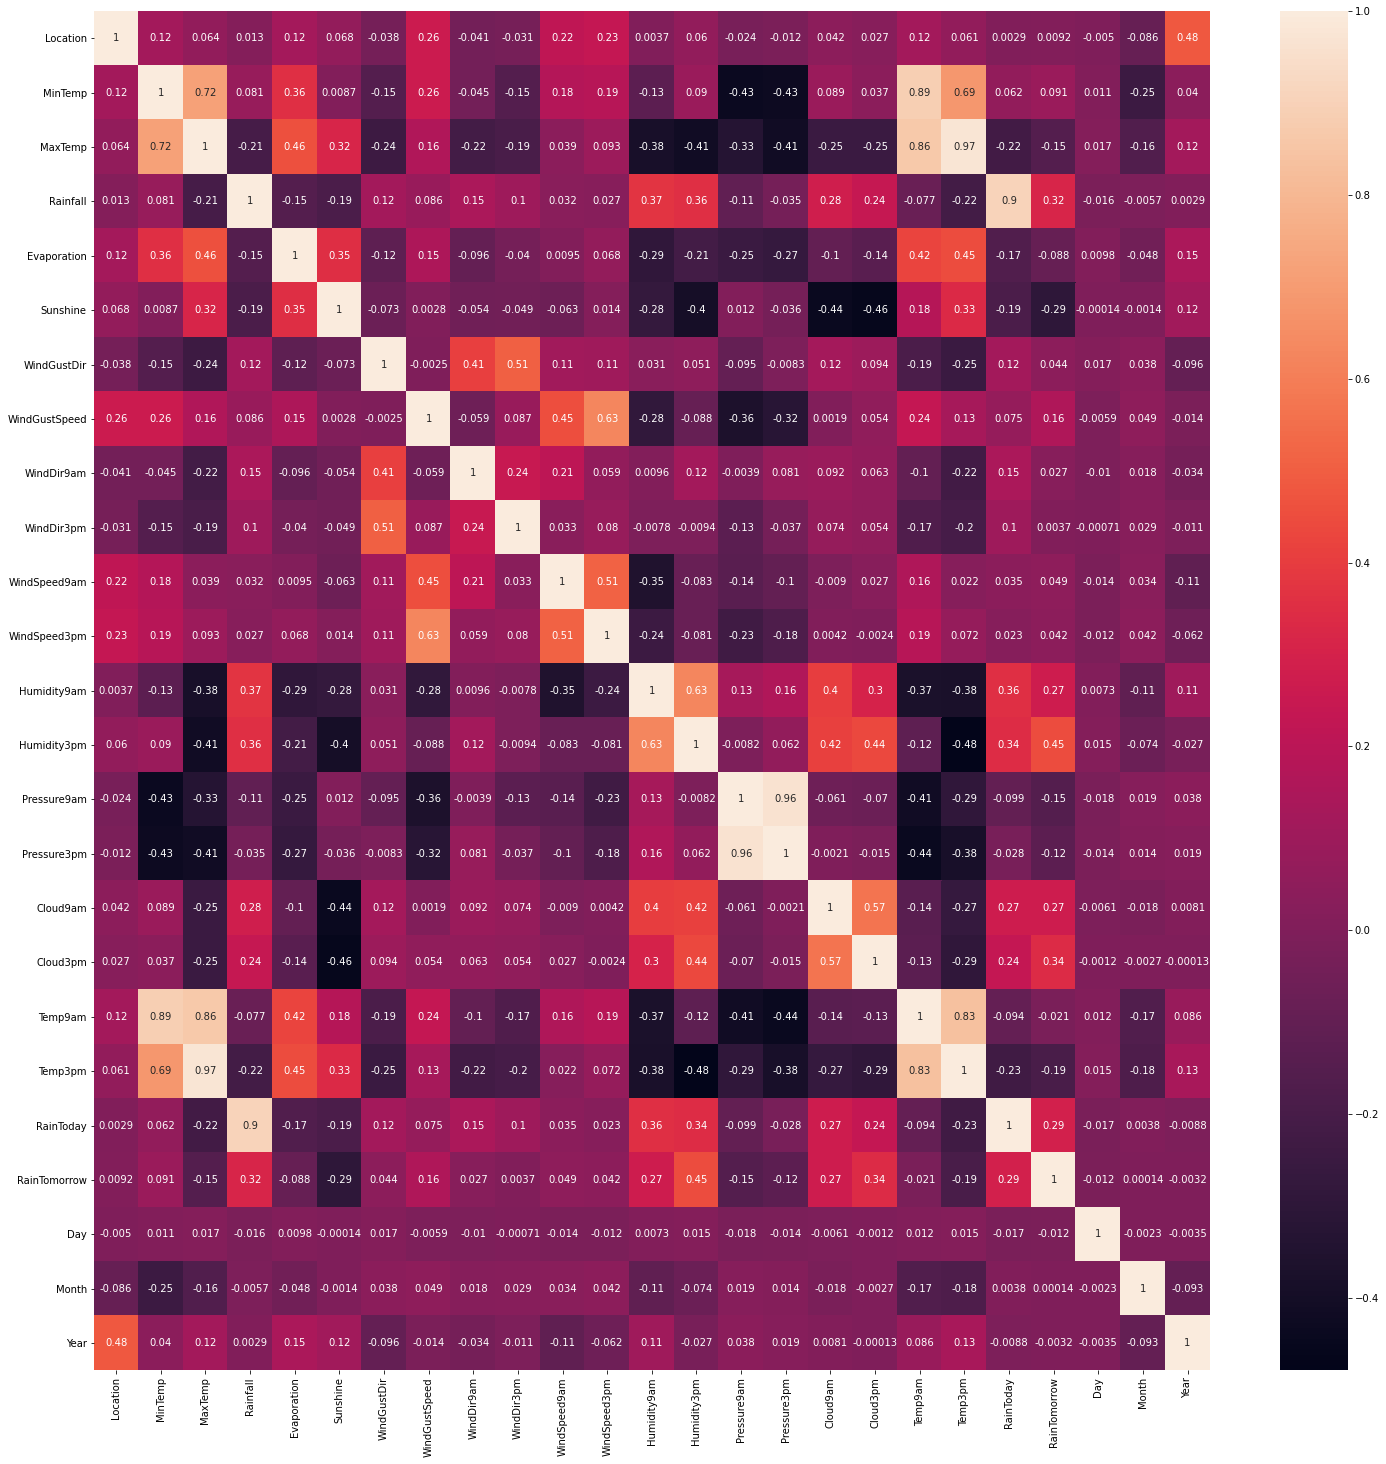

In [34]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,25))
sns.heatmap(df_new.corr(),color ='k',annot=True)

## **Splitting feature and label into x and y**

In [35]:
x = df_new.drop("RainTomorrow", axis=1)
y = df_new["RainTomorrow"]

## **Feature Scaling using Standard Scalarization**

In [36]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0    -1.508427  0.056444 -0.145732 -0.001029       0.2832  0.169416   
1    -1.508427 -1.058476  0.220676 -0.543392       0.2832  0.169416   
2    -1.508427 -0.036466  0.320605 -0.543392       0.2832  0.169416   
3    -1.508427 -0.724000  0.703668 -0.543392       0.2832  0.169416   
4    -1.508427  0.818306  1.419829  0.256468       0.2832  0.169416   
...        ...       ...       ...       ...          ...       ...   
7982  1.029423 -1.913248 -0.062457 -0.543392       0.2832  0.169416   
7983  1.029423 -1.764592  0.253986 -0.543392       0.2832  0.169416   
7984  1.029423 -1.430116  0.520464 -0.543392       0.2832  0.169416   
7985  1.029423 -0.984148  0.537119 -0.543392       0.2832  0.169416   
7986  1.029423  0.335174  0.014151 -0.543392       0.2832  0.169416   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
0        1.229267       0.485042    1.250245    1.400214  ...    -1.687142   
1        1.441960       0.485042   -0.277857    1.626597  ...    -1.202435   
2        1.654654       0.615247    1.250245    1.626597  ...    -1.703856   
3       -0.684977      -1.274926    0.377044   -1.769138  ...    -0.032451   
4        1.229267       0.278462   -1.369358   -0.184462  ...    -1.169007   
...           ...            ...         ...         ...  ...          ...   
7982    -1.535751      -0.535770    0.377044   -1.542755  ...     1.137532   
7983    -0.259589      -1.524590    0.377044   -1.089991  ...     0.953678   
7984    -0.897670      -0.021211    0.377044    1.400214  ...     0.535827   
7985     0.378492      -0.830522    0.595344   -1.089991  ...     0.268402   
7986    -0.897670       0.219023   -1.151057   -1.316373  ...     0.402114   

      Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  \
0       -1.398115  1.425345  0.013138 -0.138099 -0.098593  -0.542476   
1       -1.279988  0.011773  0.013138 -0.084254  0.329747  -0.542476   
2       -1.128109  0.011773 -1.076661  0.597788  0.141277  -0.542476   
3       -0.436219  0.011773  0.013138  0.077282  0.706687  -0.542476   
4       -1.583744  1.013630  1.535531  0.023437  1.254963  -0.542476   
...           ...       ...       ...       ...       ...        ...   
7982     0.829435  0.011773  0.013138 -1.358595  0.004208  -0.542476   
7983     0.626930  0.011773  0.013138 -1.215007  0.364014  -0.542476   
7984     0.238796  0.011773  0.013138 -0.927832  0.638152  -0.542476   
7985     0.188170 -0.633229 -1.076661 -0.461172  0.621019  -0.542476   
7986     0.424426  1.425345  1.535531 -0.479120 -0.252796  -0.542476   

           Day     Month      Year  
0    -1.671657  1.634113 -1.661315  
1    -1.557976  1.634113 -1.661315  
2    -1.444296  1.634113 -1.661315  
3    -1.330616  1.634113 -1.661315  
4    -1.216936  1.634113 -1.661315  
...        ...       ...       ...  
7982  0.601949 -0.123726  2.004134  
7983  0.715629 -0.123726  2.004134  
7984  0.829310 -0.123726  2.004134  
7985  0.942990 -0.123726  2.004134  
7986  1.056670 -0.123726  2.004134  

[7987 rows x 24 columns]

## **Checking VIF (Multicolinearity)**

In [37]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.591950       Location
1     8.763864        MinTemp
2    26.351310        MaxTemp
3     5.619158       Rainfall
4     1.505020    Evaporation
5     1.633523       Sunshine
6     1.621681    WindGustDir
7     2.158495  WindGustSpeed
8     1.397334     WindDir9am
9     1.493832     WindDir3pm
10    1.813420   WindSpeed9am
11    1.961853   WindSpeed3pm
12    3.965018    Humidity9am
13    5.407238    Humidity3pm
14   19.987676    Pressure9am
15   19.111743    Pressure3pm
16    1.872536       Cloud9am
17    1.744289       Cloud3pm
18   17.422343        Temp9am
19   33.303116        Temp3pm
20    5.485998      RainToday
21    1.004219            Day
22    1.155271          Month
23    1.525303           Year

We can see that we have high multicolinearity in features: MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [38]:
# Dropping Temp3pm column
x.drop("Temp3pm",axis=1,inplace=True)

In [39]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.590914       Location
1     8.725374        MinTemp
2     9.618350        MaxTemp
3     5.616245       Rainfall
4     1.503205    Evaporation
5     1.632528       Sunshine
6     1.618586    WindGustDir
7     2.151185  WindGustSpeed
8     1.396733     WindDir9am
9     1.492748     WindDir3pm
10    1.813092   WindSpeed9am
11    1.959250   WindSpeed3pm
12    3.525241    Humidity9am
13    3.662225    Humidity3pm
14   19.389460    Pressure9am
15   18.611967    Pressure3pm
16    1.871821       Cloud9am
17    1.732916       Cloud3pm
18   16.053944        Temp9am
19    5.482079      RainToday
20    1.003767            Day
21    1.140366          Month
22    1.525201           Year

In [40]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [41]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.590819       Location
1     8.576956        MinTemp
2     9.205668        MaxTemp
3     5.604577       Rainfall
4     1.491358    Evaporation
5     1.632164       Sunshine
6     1.603541    WindGustDir
7     2.132035  WindGustSpeed
8     1.373054     WindDir9am
9     1.426346     WindDir3pm
10    1.803743   WindSpeed9am
11    1.942614   WindSpeed3pm
12    3.525240    Humidity9am
13    3.660159    Humidity3pm
14    1.426941    Pressure3pm
15    1.871802       Cloud9am
16    1.729608       Cloud3pm
17   16.013235        Temp9am
18    5.481682      RainToday
19    1.003108            Day
20    1.139572          Month
21    1.523032           Year

In [42]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [43]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.589072       Location
1     4.530225        MinTemp
2     5.347522        MaxTemp
3     5.595027       Rainfall
4     1.485802    Evaporation
5     1.627447       Sunshine
6     1.601592    WindGustDir
7     2.090701  WindGustSpeed
8     1.372795     WindDir9am
9     1.426023     WindDir3pm
10    1.793625   WindSpeed9am
11    1.905738   WindSpeed3pm
12    2.506676    Humidity9am
13    2.889638    Humidity3pm
14    1.424344    Pressure3pm
15    1.848180       Cloud9am
16    1.724109       Cloud3pm
17    5.480684      RainToday
18    1.002896            Day
19    1.125042          Month
20    1.498011           Year

Now we can see that we have removed all the multi-colinearity and it dont exist in the dataset

## **Oversampling**

In [44]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [46]:
y.value_counts()

1    6165
0    6165
Name: RainTomorrow, dtype: int64

## **Finding the best random state**

In [47]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9410651527439848  on Random_state  132


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [49]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7769667477696675
[[1460  380]
 [ 445 1414]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1840
           1       0.79      0.76      0.77      1859

    accuracy                           0.78      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.78      0.78      0.78      3699



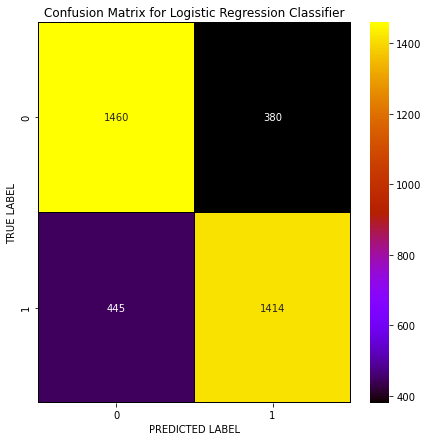

In [50]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [51]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.9402541227358746
[[1731  109]
 [ 112 1747]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1840
           1       0.94      0.94      0.94      1859

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



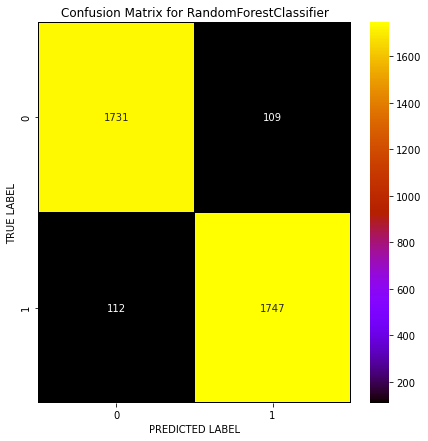

In [52]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [53]:
# Checking accuracy for AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

# Prediction
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test,predabc))

0.8204920248715869
[[1515  325]
 [ 339 1520]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1840
           1       0.82      0.82      0.82      1859

    accuracy                           0.82      3699
   macro avg       0.82      0.82      0.82      3699
weighted avg       0.82      0.82      0.82      3699



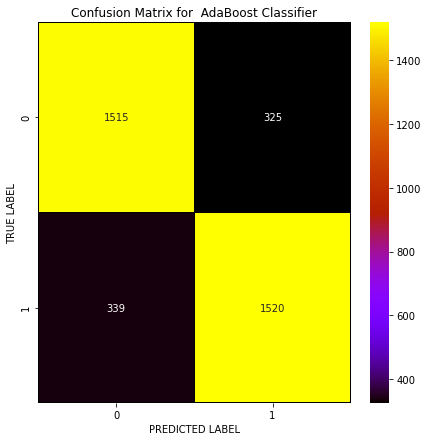

In [54]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predabc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

In [55]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.8648283319816167
[[1602  238]
 [ 262 1597]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1840
           1       0.87      0.86      0.86      1859

    accuracy                           0.86      3699
   macro avg       0.86      0.86      0.86      3699
weighted avg       0.86      0.86      0.86      3699



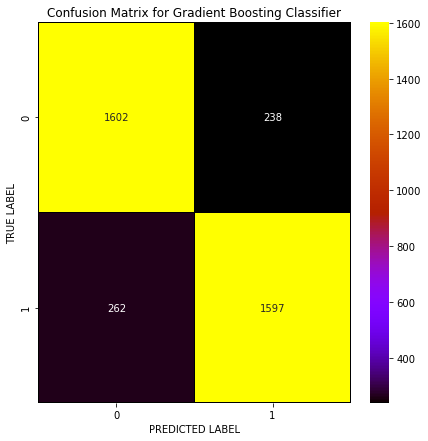

In [56]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [57]:
# Checking accuracy for ExtraTreesClassifier
xtc = ExtraTreesClassifier()
xtc.fit(x_train,y_train)

# Prediction
predxtc = xtc.predict(x_test)

print(accuracy_score(y_test, predxtc))
print(confusion_matrix(y_test, predxtc))
print(classification_report(y_test,predxtc))

0.95485266288186
[[1743   97]
 [  70 1789]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1840
           1       0.95      0.96      0.96      1859

    accuracy                           0.95      3699
   macro avg       0.95      0.95      0.95      3699
weighted avg       0.95      0.95      0.95      3699



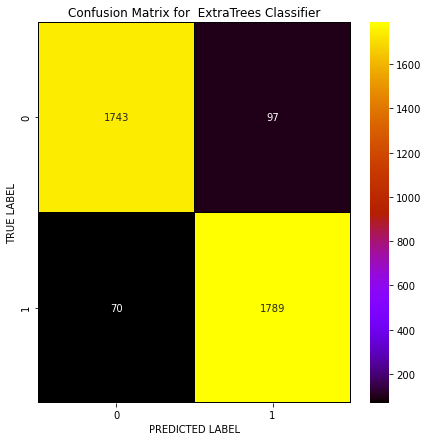

In [58]:
# Lets plot confusion matrix for  ExtraTreesClassifier
cm = confusion_matrix(y_test,predxtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

In [59]:
# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rf,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(abc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(xtc,x,y,cv=5).mean())

Logistic Regression: 0.7062449310624492
Random Forest Classifier: 0.7793187347931874
AdaBoosting Classifier: 0.6403892944038929
Gradient Boosting Classifier: 0.6695052716950528
Extra Trees Classifier: 0.7942416869424169


## **HyperParameter Tuning of the best fit model**

In [60]:
# ExtraTrees Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [61]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [63]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [64]:
Rainfall_Tomorrow=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=1000)
Rainfall_Tomorrow.fit(x_train, y_train)
pred = Rainfall_Tomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

94.80940794809408


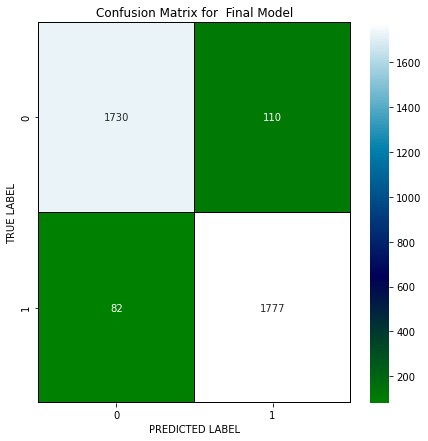

In [65]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show() 

## **Plotting ROC and Compare AUC for the best model**

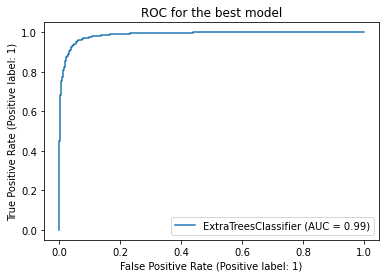

In [66]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Rainfall_Tomorrow, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

## **Saving the Model**

In [67]:
import joblib
joblib.dump(Rainfall_Tomorrow,"Prediction_of_Rainfall_Tomorrow.pkl")

['Prediction_of_Rainfall_Tomorrow.pkl']

In [68]:
# Loading the saved model
model=joblib.load("Prediction_of_Rainfall_Tomorrow.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1, 0, 0, ..., 0, 0, 0])

In [69]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0             1         1
1             0         1
2             0         0
3             1         1
4             0         0
...         ...       ...
3694          0         0
3695          0         1
3696          0         0
3697          0         0
3698          0         0

[3699 rows x 2 columns]

## **Prediction for Rainfall**

Splitting the label and feature

In [70]:
df_new.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9  0.470004      1.85464    2.1555           13   
1         1      7.4     25.1  0.000000      1.85464    2.1555           14   
2         1     12.9     25.7  0.000000      1.85464    2.1555           15   
3         1      9.2     28.0  0.000000      1.85464    2.1555            4   
4         1     17.5     32.3  0.693147      1.85464    2.1555           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0       3.806662          13          14  ...       1007.1  8.000000   
1       3.806662           6          15  ...       1007.8  4.566622   
2       3.850148          13          15  ...       1008.7  4.566622   
3       3.218876           9           0  ...       1012.8  4.566622   
4       3.737670           1           7  ...       1006.0  7.000000   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0  4.503183     16.9     21.8          0             0    1     12  2008  
1  4.503183     17.2     24.3          0             0    2     12  2008  
2  2.000000     21.0     23.2          0             0    3     12  2008  
3  4.503183     18.1     26.5          0             0    4     12  2008  
4  8.000000     17.8     29.7          0             0    5     12  2008  

[5 rows x 25 columns]

In [71]:
x = df_new.drop("Rainfall", axis=1)
y = df_new["Rainfall"]

## **Feature Scaling using Standard Scalarization**

In [72]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Location   MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  \
0    -1.508427  0.056444 -0.145732       0.2832  0.169416     1.229267   
1    -1.508427 -1.058476  0.220676       0.2832  0.169416     1.441960   
2    -1.508427 -0.036466  0.320605       0.2832  0.169416     1.654654   
3    -1.508427 -0.724000  0.703668       0.2832  0.169416    -0.684977   
4    -1.508427  0.818306  1.419829       0.2832  0.169416     1.229267   
...        ...       ...       ...          ...       ...          ...   
7982  1.029423 -1.913248 -0.062457       0.2832  0.169416    -1.535751   
7983  1.029423 -1.764592  0.253986       0.2832  0.169416    -0.259589   
7984  1.029423 -1.430116  0.520464       0.2832  0.169416    -0.897670   
7985  1.029423 -0.984148  0.537119       0.2832  0.169416     0.378492   
7986  1.029423  0.335174  0.014151       0.2832  0.169416    -0.897670   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure3pm  \
0          0.485042    1.250245    1.400214      0.742680  ...    -1.398115   
1          0.485042   -0.277857    1.626597     -0.771299  ...    -1.279988   
2          0.615247    1.250245    1.626597      0.691207  ...    -1.128109   
3         -1.274926    0.377044   -1.769138      0.152299  ...    -0.436219   
4          0.278462   -1.369358   -0.184462     -0.275457  ...    -1.583744   
...             ...         ...         ...           ...  ...          ...   
7982      -0.535770    0.377044   -1.542755      0.314924  ...     0.829435   
7983      -1.524590    0.377044   -1.089991      0.314924  ...     0.626930   
7984      -0.021211    0.377044    1.400214     -0.040046  ...     0.238796   
7985      -0.830522    0.595344   -1.089991      0.314924  ...     0.188170   
7986       0.219023   -1.151057   -1.316373      0.580055  ...     0.424426   

      Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  \
0     1.425345  0.013138 -0.138099 -0.098593  -0.542476     -0.543635   
1     0.011773  0.013138 -0.084254  0.329747  -0.542476     -0.543635   
2     0.011773 -1.076661  0.597788  0.141277  -0.542476     -0.543635   
3     0.011773  0.013138  0.077282  0.706687  -0.542476     -0.543635   
4     1.013630  1.535531  0.023437  1.254963  -0.542476     -0.543635   
...        ...       ...       ...       ...        ...           ...   
7982  0.011773  0.013138 -1.358595  0.004208  -0.542476     -0.543635   
7983  0.011773  0.013138 -1.215007  0.364014  -0.542476     -0.543635   
7984  0.011773  0.013138 -0.927832  0.638152  -0.542476     -0.543635   
7985 -0.633229 -1.076661 -0.461172  0.621019  -0.542476     -0.543635   
7986  1.425345  1.535531 -0.479120 -0.252796  -0.542476     -0.543635   

           Day     Month      Year  
0    -1.671657  1.634113 -1.661315  
1    -1.557976  1.634113 -1.661315  
2    -1.444296  1.634113 -1.661315  
3    -1.330616  1.634113 -1.661315  
4    -1.216936  1.634113 -1.661315  
...        ...       ...       ...  
7982  0.601949 -0.123726  2.004134  
7983  0.715629 -0.123726  2.004134  
7984  0.829310 -0.123726  2.004134  
7985  0.942990 -0.123726  2.004134  
7986  1.056670 -0.123726  2.004134  

[7987 rows x 24 columns]

## **Checking VIF (Multicolinearity)**


In [73]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.602216       Location
1     8.776052        MinTemp
2    26.340651        MaxTemp
3     1.505386    Evaporation
4     1.647674       Sunshine
5     1.623987    WindGustDir
6     2.216485  WindGustSpeed
7     1.396968     WindDir9am
8     1.495284     WindDir3pm
9     1.814908   WindSpeed9am
10    1.964555   WindSpeed3pm
11    3.931390    Humidity9am
12    5.646218    Humidity3pm
13   19.978666    Pressure9am
14   19.157585    Pressure3pm
15    1.872097       Cloud9am
16    1.759992       Cloud3pm
17   17.407981        Temp9am
18   33.285864        Temp3pm
19    1.364975      RainToday
20    1.433754   RainTomorrow
21    1.004627            Day
22    1.155304          Month
23    1.530013           Year

In [74]:
# Dropping MaxTemp column
x.drop("MaxTemp",axis=1,inplace=True)

In [75]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.600105       Location
1     8.762938        MinTemp
2     1.502767    Evaporation
3     1.641266       Sunshine
4     1.623369    WindGustDir
5     2.206998  WindGustSpeed
6     1.394553     WindDir9am
7     1.494076     WindDir3pm
8     1.814058   WindSpeed9am
9     1.964154   WindSpeed3pm
10    3.913258    Humidity9am
11    5.551725    Humidity3pm
12   19.974661    Pressure9am
13   19.156760    Pressure3pm
14    1.866249       Cloud9am
15    1.742123       Cloud3pm
16   17.022036        Temp9am
17   12.171585        Temp3pm
18    1.359510      RainToday
19    1.432560   RainTomorrow
20    1.004621            Day
21    1.152697          Month
22    1.529745           Year

In [76]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [77]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.600020       Location
1     8.597799        MinTemp
2     1.489207    Evaporation
3     1.640480       Sunshine
4     1.610549    WindGustDir
5     2.187804  WindGustSpeed
6     1.372896     WindDir9am
7     1.432629     WindDir3pm
8     1.804904   WindSpeed9am
9     1.951201   WindSpeed3pm
10    3.898520    Humidity9am
11    5.491018    Humidity3pm
12    1.432067    Pressure3pm
13    1.866249       Cloud9am
14    1.740003       Cloud3pm
15   16.850461        Temp9am
16   11.311603        Temp3pm
17    1.346457      RainToday
18    1.429839   RainTomorrow
19    1.003848            Day
20    1.150477          Month
21    1.528092           Year

In [78]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [79]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.599476       Location
1     4.956734        MinTemp
2     1.484270    Evaporation
3     1.633260       Sunshine
4     1.605885    WindGustDir
5     2.166456  WindGustSpeed
6     1.372360     WindDir9am
7     1.432534     WindDir3pm
8     1.794714   WindSpeed9am
9     1.910324   WindSpeed3pm
10    2.517598    Humidity9am
11    3.897107    Humidity3pm
12    1.427077    Pressure3pm
13    1.838037       Cloud9am
14    1.739675       Cloud3pm
15    6.246996        Temp3pm
16    1.343716      RainToday
17    1.429641   RainTomorrow
18    1.003496            Day
19    1.125787          Month
20    1.506110           Year

In [80]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8869893426552657  on Random_state  195


## **Random Forest Regressor**

In [81]:
# Checking R2 score for Random Forest Regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_Score:',r2_score(y_test,predrf))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predrf))
print('MSE:',metrics.mean_squared_error(y_test, predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 0.8788644359192221
MAE: 0.15579508270559736
MSE: 0.09476926126901628
RMSE: 0.3078461649412191


## **Decision Tree Regressor**

In [82]:
# Checking R2 score for Decision Tree Regressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

# prediction
preddt=dt.predict(x_test)
print('R2_Score:',r2_score(y_test,preddt))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, preddt))
print('MSE:',metrics.mean_squared_error(y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddt)))

R2_Score: 0.7719550256141826
MAE: 0.1731480766234414
MSE: 0.1784088258692068
RMSE: 0.4223846894351248


## **GradientBoosting Regressor**

In [83]:
# Checking R2 score for GradientBoosting Regressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.8508550980602607
MAE: 0.18332857563179555
MSE: 0.11668210146314775
RMSE: 0.34158761901325957


## **ExtraTrees Regressor**

In [84]:
# Checking R2 score for Extra Trees Regressor

et=ExtraTreesRegressor()
et.fit(x_train,y_train)

# prediction
predet=et.predict(x_test)
print('R2_Score:',r2_score(y_test,predet))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predet))
print('MSE:',metrics.mean_squared_error(y_test, predet))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predet)))

R2_Score: 0.8801819242381894
MAE: 0.1371313842087827
MSE: 0.0937385367607634
RMSE: 0.3061674978843499


## **Cross-Validation**

In [85]:
# Checking cv score for Random Forest Regressor
print('Random Forest:',cross_val_score(rf,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree:',cross_val_score(dt,x,y,cv=5).mean())

# Checking cv score for Gradient Boosting Regressor
print('Gradient Boosting:',cross_val_score(gb,x,y,cv=5).mean())

# Checking cv score for ExtraTreesRegressor
print('ExtraTreesRegressor:',cross_val_score(et,x,y,cv=5).mean())

Random Forest: 0.8527573269656561
Decision Tree: 0.7165724321118261
Gradient Boosting: 0.8287395499929151
ExtraTreesRegressor: 0.8619605346446285


## **Hyper parameter tuning**

In [86]:
#RandomForest Regressor

parameters = {'n_estimators' : [50,100,200],
              'criterion' :['mse', 'mae'],
              'max_depth' : [4, 6, 8]}

In [87]:
GCV=GridSearchCV(rf,parameters,cv=5)

In [88]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100, 200]})

In [89]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 8, 'n_estimators': 200}

In [90]:
Rainfall = RandomForestRegressor(criterion='mse', max_depth=8, n_estimators=100)
Rainfall.fit(x_train, y_train)
pred = Rainfall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 85.9111273797224
RMSE value: 0.33199843459054673
MAE: 0.17677574246817723
MSE: 0.11022296057057354


## **Saving the model**

In [91]:
import joblib
joblib.dump(Rainfall,"Prediction_of_Rainfall.pkl")

['Prediction_of_Rainfall.pkl']

## **Predicting the saved model**

In [92]:
# Loading the saved model
model=joblib.load("Prediction_of_Rainfall.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0.02670553, 0.02128848, 2.28858962, ..., 0.03810739, 0.03520109,
       0.02780068])

In [93]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0      0.026706  0.000000
1      0.021288  0.000000
2      2.288590  2.721295
3      0.032708  0.000000
4      0.023623  0.000000
...         ...       ...
2392   0.032863  0.000000
2393   0.058538  0.182322
2394   0.038107  0.000000
2395   0.035201  0.470004
2396   0.027801  0.000000

[2397 rows x 2 columns]